<a href="https://colab.research.google.com/github/hurileborjigin/pytorch_notes/blob/main/Pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensors with operations
- Add, subtract, multiply, devide, remainders, exponents
- Shorthand and uh longhand,
- Reasignment

In [59]:
import torch
import numpy as np

In [60]:
t1 = torch.tensor([1, 2, 3, 4])
t2 = torch.tensor([5, 6, 7, 8])

In [61]:
# Add - shorthand
t1 + t2

tensor([ 6,  8, 10, 12])

In [62]:
# Add - longhand
torch.add(t1, t2)

tensor([ 6,  8, 10, 12])

In [63]:
# Subtraction
t1 - t2

tensor([-4, -4, -4, -4])

In [64]:
torch.sub(t1, t2)

tensor([-4, -4, -4, -4])

In [65]:
# Multiplicaiton
t1 * t2

tensor([ 5, 12, 21, 32])

In [66]:
torch.mul(t1, t2)

tensor([ 5, 12, 21, 32])

In [67]:
# Division
t1/t2

tensor([0.2000, 0.3333, 0.4286, 0.5000])

In [68]:
torch.div(t1, t2)

tensor([0.2000, 0.3333, 0.4286, 0.5000])

In [69]:
# Remainders
t2%t1

tensor([0, 0, 1, 0])

In [70]:
torch.remainder(t2, t1)

tensor([0, 0, 1, 0])

In [71]:
# Exponents
t1**t2

tensor([    1,    64,  2187, 65536])

In [72]:
torch.pow(t1, t2)

tensor([    1,    64,  2187, 65536])

In [73]:
# Reasignment
t1 + t2

tensor([ 6,  8, 10, 12])

In [74]:
t3 = t1 + t2
t3

tensor([ 6,  8, 10, 12])

In [75]:
t1.add(t2)

tensor([ 6,  8, 10, 12])

In [76]:
t1

tensor([1, 2, 3, 4])

In [77]:
# Reasignment add_()
t1.add_(t2)

tensor([ 6,  8, 10, 12])

In [78]:
t1

tensor([ 6,  8, 10, 12])

# Creating NN

In [79]:
import torch.nn as nn
import torch.nn.functional as F
import torch


# Create a Model class inherits nn.Model

class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden layer H1 (number of neurons) -->
  # Hidden layer H2 (n) -->
  # output(3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))
    return x


In [80]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of Model
model = Model()


In [81]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [82]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)


In [83]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [84]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-84-31d2ab34cca2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [85]:
# Train test split
X = my_df.drop('species', axis=1)
y = my_df['species']

In [86]:
# Convert to numpy arrays
X = X.values
y = y.values


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


In [89]:
# Convert data to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [90]:
# Set the criteria of the model to measure the error, how far are the predictions from the actual category
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer, lr = learning rate(if error doesn't go down after a bunch of iterations, we just the lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [91]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [92]:
# Train the model
epochs = 100
losses = []
for i in range(epochs):
  # Go forward, get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss
  loss = criterion(y_pred, y_train)

  # Keep track of the losses
  losses.append(loss.detach().numpy())

  # Print after every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}\n')

  # Do some back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.1251550912857056

Epoch: 10 and loss: 1.0096259117126465

Epoch: 20 and loss: 0.8512223958969116

Epoch: 30 and loss: 0.654869019985199

Epoch: 40 and loss: 0.4490566551685333

Epoch: 50 and loss: 0.2707386612892151

Epoch: 60 and loss: 0.15461841225624084

Epoch: 70 and loss: 0.09299226105213165

Epoch: 80 and loss: 0.06447025388479233

Epoch: 90 and loss: 0.050585027784109116



Text(0.5, 0, 'Epochs')

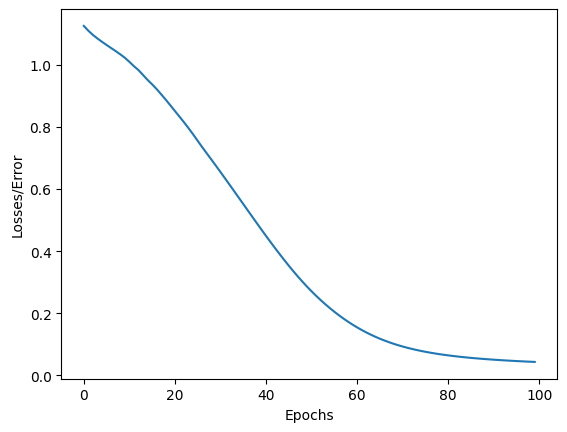

In [93]:
plt.plot(range(epochs), losses)
plt.ylabel("Losses/Error")
plt.xlabel("Epochs")

In [94]:
# Evaluate model on test data set(Validate model on test set)
with torch.no_grad(): # Basically turns off back propogation
  y_eval = model.forward(X_test) # X_test are the features are from the test dataset
  loss = criterion(y_eval, y_test)



In [95]:
loss


tensor(0.1296)

In [96]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}). {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} \n')
    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct')

1). tensor([0.0000, 7.4818, 9.9517]) 	 2 	 2 

2). tensor([ 0.0000,  7.7416, 14.4150]) 	 2 	 2 

3). tensor([ 0.0000,  9.1741, 15.2260]) 	 2 	 2 

4). tensor([0.2420, 8.3711, 4.5725]) 	 1 	 1 

5). tensor([ 0.0000,  8.4455, 12.5213]) 	 2 	 2 

6). tensor([1.6580, 8.0895, 2.0248]) 	 1 	 1 

7). tensor([0.0000, 8.1067, 9.3146]) 	 2 	 2 

8). tensor([0.3616, 8.4538, 4.3424]) 	 1 	 1 

9). tensor([ 0.0000,  8.2779, 10.8831]) 	 2 	 2 

10). tensor([ 0.0000,  8.2340, 15.2944]) 	 2 	 2 

11). tensor([0.0000, 8.0207, 8.7722]) 	 2 	 2 

12). tensor([9.0044, 3.5022, 0.0000]) 	 0 	 0 

13). tensor([8.0835, 3.2078, 0.0000]) 	 0 	 0 

14). tensor([2.2655, 6.5108, 0.4715]) 	 1 	 1 

15). tensor([8.0545, 3.9531, 0.0000]) 	 0 	 0 

16). tensor([0.0000, 8.1667, 8.0483]) 	 2 	 1 

17). tensor([8.3930, 3.3382, 0.0000]) 	 0 	 0 

18). tensor([0.0000, 7.6729, 9.5912]) 	 1 	 2 

19). tensor([8.6390, 3.3854, 0.0000]) 	 0 	 0 

20). tensor([7.5293, 3.3366, 0.0000]) 	 0 	 0 

21). tensor([2.0055, 7.1311, 1.116

In [97]:
new_iris = torch.Tensor([5.9, 3, 5.1, 1.8])

In [98]:
# Testing with new data
with torch.no_grad():
  print(model(new_iris).argmax().item())

2


In [100]:
 # Save our NN model
 torch.save(model.state_dict(), 'My_awesome_model.pt')


In [101]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('My_awesome_model.pt'))

<ipython-input-101-e1ab3f18ea1f>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('My_awesome_model.pt'))


<All keys matched successfully>

In [102]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [103]:
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)